In [1]:
import joblib

data_time_load = joblib.load('datetime.pkl')
queue_output_test_load = joblib.load('truth_data.txt')
test_predict_load = joblib.load('predict_data.txt')

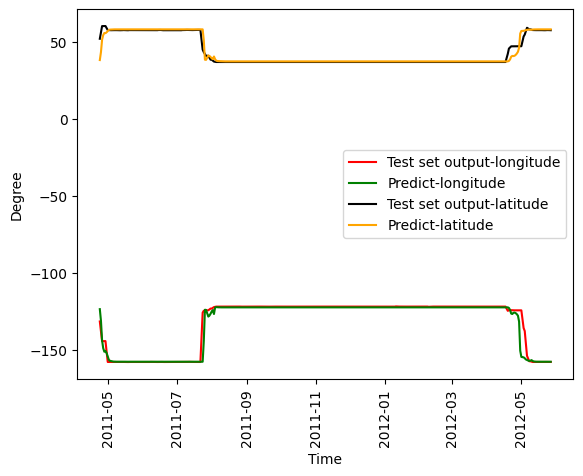

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
data_time = data_time_load
plt.plot(data_time,queue_output_test_load[:,0],color='red',label='Test set output-longitude')
plt.plot(data_time,test_predict_load[:,0],color='green',label='Predict-longitude')
plt.legend()

plt.plot(data_time,queue_output_test_load[:,1],color='black',label='Test set output-latitude')
plt.plot(data_time,test_predict_load[:,1],color='orange',label='Predict-latitude')
plt.legend()
#plt.plot(data_time,train_predict_1,color='black')
plt.xticks(rotation=90)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Degree')

plt.show()
fig.savefig('1.jpg', dpi=300, bbox_inches='tight')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Input the data
data = pd.read_csv('marbledGodwit_USGS_ASC_argos_1.csv');

b=data.shape;   #shape

# filter out one animols
animal_ID_MAGO_7H = data[data['individual-local-identifier']=='MAGO_7H']

import time
import datetime
# timestamp
animal_ID_MAGO_7H.timestamp = pd.to_datetime(animal_ID_MAGO_7H.timestamp)

# set index (datetime)
animal_ID_MAGO_7H = animal_ID_MAGO_7H.set_index('timestamp')
animal_ID_MAGO_7H.head()

# sort the index
animal_ID_MAGO_7H.sort_index(ascending = True).head()

# the location of animal
animal_ID_MAGO_7H_pre_data = animal_ID_MAGO_7H[animal_ID_MAGO_7H.columns[2:4]]
animal_ID_MAGO_7H_pre_data

a = animal_ID_MAGO_7H_pre_data.resample('D').mean()
animal_ID_MAGO_7H_data = a.resample('D').interpolate('linear')

C:\Users\Studying\anaconda3\envs\SNS\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [4]:
year_2008_longitude_data=[]
year_2008_latitude_data=[]

year_2009_longitude_data=[]
year_2009_latitude_data=[]

year_2010_longitude_data=[]
year_2010_latitude_data=[]

year_2011_longitude_data=[]
year_2011_latitude_data=[]

year_2012_longitude_data=[]
year_2012_latitude_data=[]


for i in range(365):

    year_2008_longitude_data.append(animal_ID_MAGO_7H_data['location_long'][i])
    year_2008_latitude_data.append(animal_ID_MAGO_7H_data['location_lat'][i])


    year_2009_longitude_data.append(animal_ID_MAGO_7H_data['location_long'][i+365])
    year_2009_latitude_data.append(animal_ID_MAGO_7H_data['location_lat'][i+365])


    year_2010_longitude_data.append(animal_ID_MAGO_7H_data['location_long'][i+365+365])
    year_2010_latitude_data.append(animal_ID_MAGO_7H_data['location_lat'][i+365+365])


    year_2011_longitude_data.append(animal_ID_MAGO_7H_data['location_long'][i+365+365+345])
    year_2011_latitude_data.append(animal_ID_MAGO_7H_data['location_lat'][i+365+365+345])
        

C:\Users\Studying\anaconda3\envs\SNS\lib\site-packages\ipykernel_launcher.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c*" (-> color='c'). The keyword argument will take precedence.
C:\Users\Studying\anaconda3\envs\SNS\lib\site-packages\ipykernel_launcher.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c*" (-> color='c'). The keyword argument will take precedence.
C:\Users\Studying\anaconda3\envs\SNS\lib\site-packages\ipykernel_launcher.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c*" (-> color='c'). The keyword argument will take precedence.
C:\Users\Studying\anaconda3\envs\SNS\lib\site-packages\ipykernel_launcher.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c*" (-> color='c'). The keyword argument will take precedence.
C:\Users\Studying\anaconda3\envs\SNS\lib\site-pa

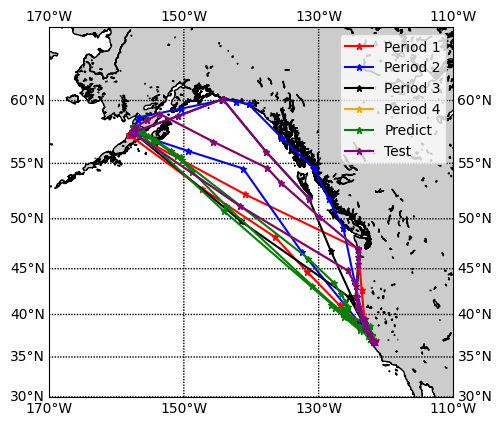

In [5]:
from mpl_toolkits.basemap import Basemap
import numpy as np

fig = plt.figure()
# Define the sise of map
mymap = Basemap(llcrnrlon=-170, llcrnrlat=30, urcrnrlon=-110, urcrnrlat=65, resolution='h', projection='merc')

mymap.drawparallels(np.arange(30,65,5),labels=[1, 1, 1, 1])
mymap.drawmeridians(np.arange(-170,-109.9, 20),labels=[1, 1, 1, 1])

mymap.drawcoastlines()
mymap.fillcontinents()

# 2008
long_1=year_2008_longitude_data
lat_1=year_2008_latitude_data

xpt_1, ypt_1 = mymap(long_1, lat_1)
mymap.plot(xpt_1, ypt_1, 'c*', markersize=5, c='red',linestyle='-',label='Period 1')

# 2009
long_2=year_2009_longitude_data
lat_2=year_2009_latitude_data

xpt_2, ypt_2 = mymap(long_2, lat_2)
mymap.plot(xpt_2, ypt_2, 'c*', markersize=5, c='blue',linestyle='-',label='Period 2')

# 2010
long_3=year_2010_longitude_data
lat_3=year_2010_latitude_data

xpt_3, ypt_3 = mymap(long_3, lat_3)
mymap.plot(xpt_3, ypt_3, 'c*', markersize=5, c='black',linestyle='-',label='Period 3')

# 2011
long_4=year_2011_longitude_data
lat_4=year_2011_latitude_data

xpt_4, ypt_4 = mymap(long_4, lat_4)
mymap.plot(xpt_4, ypt_4, 'c*', markersize=5, c='orange',linestyle='-',label='Period 4')

# # predict
# long_5=test_predict_load[:,0]
# lat_5=test_predict_load[:,1]

# xpt_5, ypt_5 = mymap(long_5, lat_5)
# mymap.plot(xpt_5, ypt_5, 'c*', markersize=5, c='green',linestyle='-',label='Predict')

# # Test
# long_6=queue_output_test_load[:,0]
# lat_6=queue_output_test_load[:,1]

# xpt_6, ypt_6 = mymap(long_6, lat_6)
# mymap.plot(xpt_6, ypt_6, 'c*', markersize=5, c='purple',linestyle='-',label='Test')

plt.legend(loc='upper right')
plt.show()
fig.savefig('2.jpg', dpi=300, bbox_inches='tight')